In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import data
#split into train_test_Validatios sets
#Build a model
#Fit the model
#evaluate the model 

In [3]:
def importa(archivo,nombres):
 data = pd.read_csv(archivo,sep=',',names=nombres,skiprows=0)#para archivo simple
 return data

In [4]:
def sigmoid(z):
 sigma=1/(1+np.exp(-z))
 return sigma
def MSE(y,h): 
    C=np.mean(((y-h)**2))
    return C
def dC(y,h,nlf): #dC/dh
 dcdh=(-2*(y-h))/nlf
 return dcdh
def dh(z): #dh/dz
 dhdz=sigmoid(z)*(1-sigmoid(z))
 return dhdz
def dz(h): #dz/dw
 dzdw=h
 return dzdw

In [5]:
def input(h,data,i):
      h[0][0]=data.I1[i] 
      h[0][1]=data.I2[i]
      return h[0]

In [6]:
def train(data,etha,epochs):
  w=np.array((np.random.rand(2,2)))
  h=np.array((np.random.rand(2,1),np.random.rand(2,1)))
  b=np.array((np.random.rand(2,1)))
  iw=w
  ib=b
  #alpha=.1
  costo=[]
  print('initial weights:',iw)
  for e in range(epochs):
       for i in range(0,len(data.I1)):
        z=w.dot(input(h,data,i))+b
        h[1]=sigmoid(z)
        y=np.array([[data.OR[i]],[data.AND[i]]])
        Dw=np.transpose(dC(y,h[1],2)*dh(z)*dz(input(h,data,i)))
        Db=dC(y,h[1],2)*dh(z)
        w=w-(etha*Dw)
        b=b-(etha*Db)
       costo.append(MSE(y,h[1]))
       #print(MSE(y,h[1]))
  dfcost=pd.DataFrame(costo)
  fig, ax=plt.subplots(figsize=(20,10))
  ax.plot(dfcost)
  print('final weights',w)
  print('bias',b)
  print('final cost',MSE(y,h[1]))
  return(w,h,b,iw,ib)
#h=np.array((np.random.rand(2,1),np.random.rand(2,1)))
#b=np.array((np.random.rand(2,1)))

In [7]:
def predict(h,w):
      z=w.dot(h[0])+b
      h[1]=sigmoid(z)
      return(h[1])

In [8]:
archivo='ANDOR.csv'
nombres=['I1','I2','OR','AND']
data=importa(archivo,nombres)
data

,I1,I2,OR,AND
0,1,1,1,1
1,0,1,1,0
2,1,0,1,0
3,0,0,0,0


initial weights: [[0.82530677 0.06377021]
 [0.77765029 0.63266561]]
final weights [[10.61608654  9.89838086]
 [10.56843006 10.46727626]]
bias [[ -4.87178141]
 [-15.85204022]]
final cost 2.8924209884620554e-05


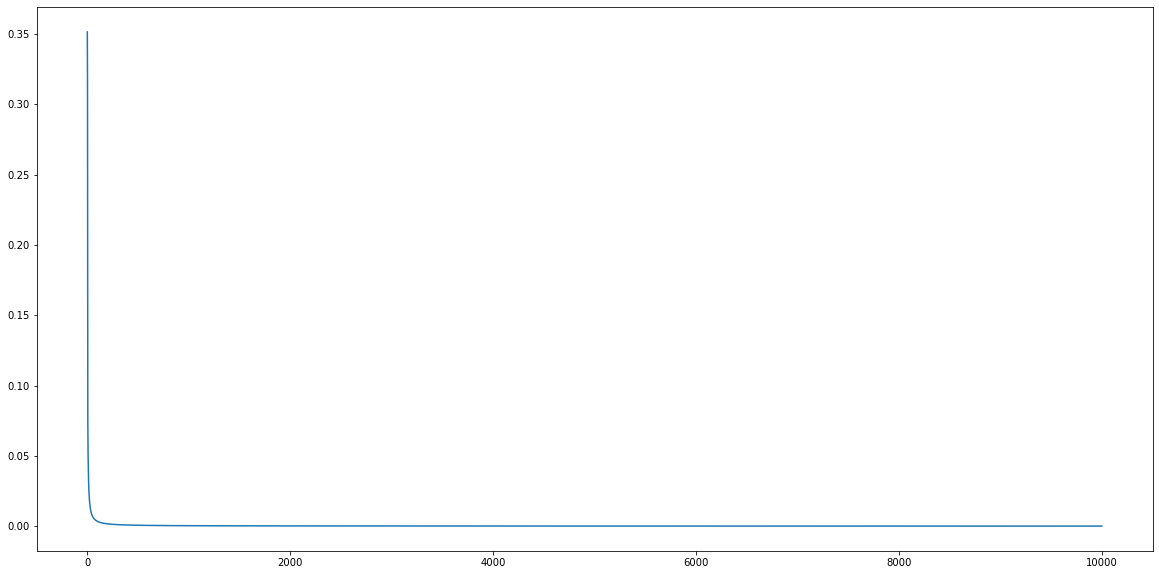

In [9]:
epochs=10000
etha=10
#nl2=2
T=train(data,etha,epochs)
w=T[0]
h=T[1]
b=T[2]

In [10]:
for i in range (0,4,1):
 print(str(input(h,data,i))+ str(predict(h,w)))

[[1.]
 [1.]][[0.99999984]
 [0.99442386]]
[[0.]
 [1.]][[0.99348168]
 [0.00456499]]
[[1.]
 [0.]][[0.99680926]
 [0.00504846]]
[[0.]
 [0.]][[7.60148292e-03]
 [1.30480721e-07]]


In [11]:
T[3]

array([[0.82530677, 0.06377021],
       [0.77765029, 0.63266561]])

# Tensorflow

In [12]:
import tensorflow as tf #1st part
from tensorflow  import keras 
from tensorflow.keras import layers

In [13]:
x_train=np.array([[1,1],[1,0],[0,1],[0,0]])
y_train=np.array([[1,1],[1,0],[1,0],[0,0]])
initial_weights=T[3]
ib=T[4]

In [14]:
model=keras.Sequential()
model.add(keras.Input(shape=2))
model.add(layers.Dense(2,activation='sigmoid'))
#model.set_weights([initial_weights])
#print(model.summary())
model.compile(loss="MSE",optimizer=keras.optimizers.SGD(lr=10))
model.fit(x_train,y_train,epochs=8000)
model.summary()
print(model.weights)

Train on 4 samples
Epoch 1/8000
4/4 [==============================] - 0s 57ms/sample - loss: 0.2672
Epoch 2/8000
4/4 [==============================] - 0s 499us/sample - loss: 0.1669
Epoch 3/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.1467
Epoch 4/8000
4/4 [==============================] - 0s 499us/sample - loss: 0.1324
Epoch 5/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.1205
Epoch 6/8000
4/4 [==============================] - 0s 749us/sample - loss: 0.1102
Epoch 7/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.1012
Epoch 8/8000
4/4 [==============================] - 0s 999us/sample - loss: 0.0935
Epoch 9/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0867
Epoch 10/8000
4/4 [==============================] - 0s 499us/sample - loss: 0.0808
Epoch 11/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0757
Epoch 12/8000
4/4 [==============================] - 0s 749us/sampl

Epoch 99/8000
4/4 [==============================] - 0s 749us/sample - loss: 0.0094
Epoch 100/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0093
Epoch 101/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0092
Epoch 102/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0091
Epoch 103/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0090
Epoch 104/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0089
Epoch 105/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0088
Epoch 106/8000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0087
Epoch 107/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0086
Epoch 108/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0085
Epoch 109/8000
4/4 [==============================] - 0s 749us/sample - loss: 0.0084
Epoch 110/8000
4/4 [==============================] - 0s 750us/sampl

Epoch 196/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0044
Epoch 197/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0043
Epoch 198/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0043
Epoch 199/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0043
Epoch 200/8000
4/4 [==============================] - 0s 749us/sample - loss: 0.0043
Epoch 201/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0043
Epoch 202/8000
4/4 [==============================] - 0s 999us/sample - loss: 0.0042
Epoch 203/8000
4/4 [==============================] - 0s 751us/sample - loss: 0.0042
Epoch 204/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0042
Epoch 205/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0042
Epoch 206/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0041
Epoch 207/8000
4/4 [==============================] - 0s 500us/sa

Epoch 293/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0028
Epoch 294/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0028
Epoch 295/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0028
Epoch 296/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0028
Epoch 297/8000
4/4 [==============================] - 0s 749us/sample - loss: 0.0028
Epoch 298/8000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0027
Epoch 299/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0027
Epoch 300/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0027
Epoch 301/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0027
Epoch 302/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0027
Epoch 303/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0027
Epoch 304/8000
4/4 [==============================] - 0s 500us/samp

Epoch 390/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0020
Epoch 391/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0020
Epoch 392/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0020
Epoch 393/8000
4/4 [==============================] - 0s 499us/sample - loss: 0.0020
Epoch 394/8000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0020
Epoch 395/8000
4/4 [==============================] - 0s 749us/sample - loss: 0.0020
Epoch 396/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0020
Epoch 397/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0020
Epoch 398/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0020
Epoch 399/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0020
Epoch 400/8000
4/4 [==============================] - 0s 499us/sample - loss: 0.0020
Epoch 401/8000
4/4 [==============================] - 0s 1000us/sam

Epoch 487/8000
4/4 [==============================] - 0s 999us/sample - loss: 0.0016
Epoch 488/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0016
Epoch 489/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0016
Epoch 490/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0016
Epoch 491/8000
4/4 [==============================] - 0s 999us/sample - loss: 0.0016
Epoch 492/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0016
Epoch 493/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0016
Epoch 494/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0016
Epoch 495/8000
4/4 [==============================] - 0s 999us/sample - loss: 0.0016
Epoch 496/8000
4/4 [==============================] - 0s 749us/sample - loss: 0.0016
Epoch 497/8000
4/4 [==============================] - 0s 749us/sample - loss: 0.0016
Epoch 498/8000
4/4 [==============================] - 0s 999us/sa

Epoch 584/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0013
Epoch 585/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0013
Epoch 586/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0013
Epoch 587/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0013
Epoch 588/8000
4/4 [==============================] - 0s 999us/sample - loss: 0.0013
Epoch 589/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0013
Epoch 590/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0013
Epoch 591/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0013
Epoch 592/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0013
Epoch 593/8000
4/4 [==============================] - 0s 749us/sample - loss: 0.0013
Epoch 594/8000
4/4 [==============================] - 0s 499us/sample - loss: 0.0013
Epoch 595/8000
4/4 [==============================] - 0s 500us/sa

Epoch 681/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0011
Epoch 682/8000
4/4 [==============================] - 0s 999us/sample - loss: 0.0011
Epoch 683/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0011
Epoch 684/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0011
Epoch 685/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0011
Epoch 686/8000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0011
Epoch 687/8000
4/4 [==============================] - 0s 750us/sample - loss: 0.0011
Epoch 688/8000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0011
Epoch 689/8000
4/4 [==============================] - 0s 749us/sample - loss: 0.0011
Epoch 690/8000
4/4 [==============================] - 0s 500us/sample - loss: 0.0011
Epoch 691/8000
4/4 [==============================] - 0s 1000us/sample - loss: 0.0011
Epoch 692/8000
4/4 [==============================] - 0s 750us/sa

Epoch 777/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.6877e-04
Epoch 778/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.6744e-04
Epoch 779/8000
4/4 [==============================] - 0s 749us/sample - loss: 9.6610e-04
Epoch 780/8000
4/4 [==============================] - 0s 749us/sample - loss: 9.6478e-04
Epoch 781/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.6345e-04
Epoch 782/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.6213e-04
Epoch 783/8000
4/4 [==============================] - 0s 1000us/sample - loss: 9.6082e-04
Epoch 784/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.5951e-04
Epoch 785/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.5820e-04
Epoch 786/8000
4/4 [==============================] - 0s 1000us/sample - loss: 9.5689e-04
Epoch 787/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.5559e-04
Epoch 788/8000
4/4 

Epoch 870/8000
4/4 [==============================] - 0s 499us/sample - loss: 8.5842e-04
Epoch 871/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.5736e-04
Epoch 872/8000
4/4 [==============================] - 0s 1ms/sample - loss: 8.5631e-04
Epoch 873/8000
4/4 [==============================] - 0s 499us/sample - loss: 8.5527e-04
Epoch 874/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.5422e-04
Epoch 875/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.5318e-04
Epoch 876/8000
4/4 [==============================] - 0s 250us/sample - loss: 8.5214e-04
Epoch 877/8000
4/4 [==============================] - 0s 500us/sample - loss: 8.5110e-04
Epoch 878/8000
4/4 [==============================] - 0s 1ms/sample - loss: 8.5007e-04
Epoch 879/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.4903e-04
Epoch 880/8000
4/4 [==============================] - 0s 500us/sample - loss: 8.4800e-04
Epoch 881/8000
4/4 [=====

Epoch 963/8000
4/4 [==============================] - 0s 500us/sample - loss: 7.7030e-04
Epoch 964/8000
4/4 [==============================] - 0s 749us/sample - loss: 7.6945e-04
Epoch 965/8000
4/4 [==============================] - 0s 500us/sample - loss: 7.6860e-04
Epoch 966/8000
4/4 [==============================] - 0s 749us/sample - loss: 7.6775e-04
Epoch 967/8000
4/4 [==============================] - 0s 1ms/sample - loss: 7.6691e-04
Epoch 968/8000
4/4 [==============================] - 0s 749us/sample - loss: 7.6606e-04
Epoch 969/8000
4/4 [==============================] - 0s 750us/sample - loss: 7.6522e-04
Epoch 970/8000
4/4 [==============================] - 0s 500us/sample - loss: 7.6438e-04
Epoch 971/8000
4/4 [==============================] - 0s 500us/sample - loss: 7.6354e-04
Epoch 972/8000
4/4 [==============================] - 0s 750us/sample - loss: 7.6270e-04
Epoch 973/8000
4/4 [==============================] - 0s 750us/sample - loss: 7.6187e-04
Epoch 974/8000
4/4 [===

Epoch 1055/8000
4/4 [==============================] - 0s 999us/sample - loss: 6.9905e-04
Epoch 1056/8000
4/4 [==============================] - 0s 749us/sample - loss: 6.9835e-04
Epoch 1057/8000
4/4 [==============================] - 0s 500us/sample - loss: 6.9765e-04
Epoch 1058/8000
4/4 [==============================] - 0s 749us/sample - loss: 6.9695e-04
Epoch 1059/8000
4/4 [==============================] - 0s 750us/sample - loss: 6.9625e-04
Epoch 1060/8000
4/4 [==============================] - 0s 1000us/sample - loss: 6.9555e-04
Epoch 1061/8000
4/4 [==============================] - 0s 749us/sample - loss: 6.9486e-04
Epoch 1062/8000
4/4 [==============================] - 0s 750us/sample - loss: 6.9416e-04
Epoch 1063/8000
4/4 [==============================] - 0s 750us/sample - loss: 6.9347e-04
Epoch 1064/8000
4/4 [==============================] - 0s 500us/sample - loss: 6.9278e-04
Epoch 1065/8000
4/4 [==============================] - 0s 500us/sample - loss: 6.9208e-04
Epoch 106

Epoch 1147/8000
4/4 [==============================] - 0s 750us/sample - loss: 6.3971e-04
Epoch 1148/8000
4/4 [==============================] - 0s 750us/sample - loss: 6.3911e-04
Epoch 1149/8000
4/4 [==============================] - 0s 750us/sample - loss: 6.3852e-04
Epoch 1150/8000
4/4 [==============================] - 0s 500us/sample - loss: 6.3794e-04
Epoch 1151/8000
4/4 [==============================] - 0s 500us/sample - loss: 6.3735e-04
Epoch 1152/8000
4/4 [==============================] - 0s 1000us/sample - loss: 6.3676e-04
Epoch 1153/8000
4/4 [==============================] - 0s 500us/sample - loss: 6.3618e-04
Epoch 1154/8000
4/4 [==============================] - 0s 750us/sample - loss: 6.3559e-04
Epoch 1155/8000
4/4 [==============================] - 0s 750us/sample - loss: 6.3501e-04
Epoch 1156/8000
4/4 [==============================] - 0s 500us/sample - loss: 6.3443e-04
Epoch 1157/8000
4/4 [==============================] - 0s 750us/sample - loss: 6.3385e-04
Epoch 115

Epoch 1238/8000
4/4 [==============================] - 0s 750us/sample - loss: 5.9002e-04
Epoch 1239/8000
4/4 [==============================] - 0s 750us/sample - loss: 5.8952e-04
Epoch 1240/8000
4/4 [==============================] - 0s 750us/sample - loss: 5.8902e-04
Epoch 1241/8000
4/4 [==============================] - 0s 500us/sample - loss: 5.8851e-04
Epoch 1242/8000
4/4 [==============================] - 0s 500us/sample - loss: 5.8801e-04
Epoch 1243/8000
4/4 [==============================] - 0s 500us/sample - loss: 5.8751e-04
Epoch 1244/8000
4/4 [==============================] - 0s 750us/sample - loss: 5.8701e-04
Epoch 1245/8000
4/4 [==============================] - 0s 750us/sample - loss: 5.8652e-04
Epoch 1246/8000
4/4 [==============================] - 0s 500us/sample - loss: 5.8602e-04
Epoch 1247/8000
4/4 [==============================] - 0s 750us/sample - loss: 5.8552e-04
Epoch 1248/8000
4/4 [==============================] - 0s 500us/sample - loss: 5.8502e-04
Epoch 1249

Epoch 1330/8000
4/4 [==============================] - 0s 749us/sample - loss: 5.4697e-04
Epoch 1331/8000
4/4 [==============================] - 0s 750us/sample - loss: 5.4654e-04
Epoch 1332/8000
4/4 [==============================] - 0s 500us/sample - loss: 5.4611e-04
Epoch 1333/8000
4/4 [==============================] - 0s 500us/sample - loss: 5.4567e-04
Epoch 1334/8000
4/4 [==============================] - 0s 750us/sample - loss: 5.4524e-04
Epoch 1335/8000
4/4 [==============================] - 0s 749us/sample - loss: 5.4481e-04
Epoch 1336/8000
4/4 [==============================] - 0s 500us/sample - loss: 5.4438e-04
Epoch 1337/8000
4/4 [==============================] - 0s 750us/sample - loss: 5.4395e-04
Epoch 1338/8000
4/4 [==============================] - 0s 501us/sample - loss: 5.4352e-04
Epoch 1339/8000
4/4 [==============================] - 0s 750us/sample - loss: 5.4309e-04
Epoch 1340/8000
4/4 [==============================] - 0s 1ms/sample - loss: 5.4267e-04
Epoch 1341/8

Epoch 1422/8000
4/4 [==============================] - 0s 500us/sample - loss: 5.0970e-04
Epoch 1423/8000
4/4 [==============================] - 0s 500us/sample - loss: 5.0933e-04
Epoch 1424/8000
4/4 [==============================] - 0s 499us/sample - loss: 5.0895e-04
Epoch 1425/8000
4/4 [==============================] - 0s 500us/sample - loss: 5.0857e-04
Epoch 1426/8000
4/4 [==============================] - 0s 500us/sample - loss: 5.0820e-04
Epoch 1427/8000
4/4 [==============================] - 0s 749us/sample - loss: 5.0782e-04
Epoch 1428/8000
4/4 [==============================] - 0s 750us/sample - loss: 5.0745e-04
Epoch 1429/8000
4/4 [==============================] - 0s 500us/sample - loss: 5.0707e-04
Epoch 1430/8000
4/4 [==============================] - 0s 1000us/sample - loss: 5.0670e-04
Epoch 1431/8000
4/4 [==============================] - 0s 749us/sample - loss: 5.0633e-04
Epoch 1432/8000
4/4 [==============================] - 0s 750us/sample - loss: 5.0595e-04
Epoch 143

Epoch 1514/8000
4/4 [==============================] - 0s 750us/sample - loss: 4.7713e-04
Epoch 1515/8000
4/4 [==============================] - 0s 500us/sample - loss: 4.7680e-04
Epoch 1516/8000
4/4 [==============================] - 0s 500us/sample - loss: 4.7647e-04
Epoch 1517/8000
4/4 [==============================] - 0s 500us/sample - loss: 4.7614e-04
Epoch 1518/8000
4/4 [==============================] - 0s 750us/sample - loss: 4.7581e-04
Epoch 1519/8000
4/4 [==============================] - 0s 500us/sample - loss: 4.7548e-04
Epoch 1520/8000
4/4 [==============================] - 0s 750us/sample - loss: 4.7515e-04
Epoch 1521/8000
4/4 [==============================] - 0s 750us/sample - loss: 4.7482e-04
Epoch 1522/8000
4/4 [==============================] - 0s 500us/sample - loss: 4.7449e-04
Epoch 1523/8000
4/4 [==============================] - 0s 500us/sample - loss: 4.7416e-04
Epoch 1524/8000
4/4 [==============================] - 0s 750us/sample - loss: 4.7384e-04
Epoch 1525

Epoch 1606/8000
4/4 [==============================] - 0s 500us/sample - loss: 4.4842e-04
Epoch 1607/8000
4/4 [==============================] - 0s 1ms/sample - loss: 4.4813e-04
Epoch 1608/8000
4/4 [==============================] - 0s 1ms/sample - loss: 4.4784e-04
Epoch 1609/8000
4/4 [==============================] - 0s 750us/sample - loss: 4.4754e-04
Epoch 1610/8000
4/4 [==============================] - 0s 500us/sample - loss: 4.4725e-04
Epoch 1611/8000
4/4 [==============================] - 0s 750us/sample - loss: 4.4696e-04
Epoch 1612/8000
4/4 [==============================] - 0s 750us/sample - loss: 4.4667e-04
Epoch 1613/8000
4/4 [==============================] - 0s 998us/sample - loss: 4.4638e-04
Epoch 1614/8000
4/4 [==============================] - 0s 500us/sample - loss: 4.4609e-04
Epoch 1615/8000
4/4 [==============================] - 0s 750us/sample - loss: 4.4580e-04
Epoch 1616/8000
4/4 [==============================] - 0s 500us/sample - loss: 4.4551e-04
Epoch 1617/800

Epoch 1698/8000
4/4 [==============================] - 0s 999us/sample - loss: 4.2294e-04
Epoch 1699/8000
4/4 [==============================] - 0s 500us/sample - loss: 4.2267e-04
Epoch 1700/8000
4/4 [==============================] - 0s 750us/sample - loss: 4.2241e-04
Epoch 1701/8000
4/4 [==============================] - 0s 500us/sample - loss: 4.2215e-04
Epoch 1702/8000
4/4 [==============================] - 0s 750us/sample - loss: 4.2189e-04
Epoch 1703/8000
4/4 [==============================] - 0s 500us/sample - loss: 4.2163e-04
Epoch 1704/8000
4/4 [==============================] - 0s 500us/sample - loss: 4.2137e-04
Epoch 1705/8000
4/4 [==============================] - 0s 500us/sample - loss: 4.2111e-04
Epoch 1706/8000
4/4 [==============================] - 0s 750us/sample - loss: 4.2085e-04
Epoch 1707/8000
4/4 [==============================] - 0s 500us/sample - loss: 4.2060e-04
Epoch 1708/8000
4/4 [==============================] - 0s 750us/sample - loss: 4.2034e-04
Epoch 1709

Epoch 1790/8000
4/4 [==============================] - 0s 500us/sample - loss: 4.0016e-04
Epoch 1791/8000
4/4 [==============================] - 0s 749us/sample - loss: 3.9992e-04
Epoch 1792/8000
4/4 [==============================] - 0s 499us/sample - loss: 3.9969e-04
Epoch 1793/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.9946e-04
Epoch 1794/8000
4/4 [==============================] - 0s 1ms/sample - loss: 3.9922e-04
Epoch 1795/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.9899e-04
Epoch 1796/8000
4/4 [==============================] - 0s 499us/sample - loss: 3.9876e-04
Epoch 1797/8000
4/4 [==============================] - 0s 749us/sample - loss: 3.9852e-04
Epoch 1798/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.9829e-04
Epoch 1799/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.9806e-04
Epoch 1800/8000
4/4 [==============================] - 0s 499us/sample - loss: 3.9783e-04
Epoch 1801/8

Epoch 1882/8000
4/4 [==============================] - 0s 499us/sample - loss: 3.7968e-04
Epoch 1883/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.7947e-04
Epoch 1884/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.7926e-04
Epoch 1885/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.7905e-04
Epoch 1886/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.7884e-04
Epoch 1887/8000
4/4 [==============================] - 0s 1000us/sample - loss: 3.7863e-04
Epoch 1888/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.7842e-04
Epoch 1889/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.7821e-04
Epoch 1890/8000
4/4 [==============================] - 0s 999us/sample - loss: 3.7800e-04
Epoch 1891/8000
4/4 [==============================] - 0s 749us/sample - loss: 3.7779e-04
Epoch 1892/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.7758e-04
Epoch 189

Epoch 1974/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.6118e-04
Epoch 1975/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.6099e-04
Epoch 1976/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.6080e-04
Epoch 1977/8000
4/4 [==============================] - 0s 749us/sample - loss: 3.6060e-04
Epoch 1978/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.6041e-04
Epoch 1979/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.6022e-04
Epoch 1980/8000
4/4 [==============================] - 0s 3ms/sample - loss: 3.6003e-04
Epoch 1981/8000
4/4 [==============================] - 0s 749us/sample - loss: 3.5984e-04
Epoch 1982/8000
4/4 [==============================] - 0s 1000us/sample - loss: 3.5965e-04
Epoch 1983/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.5946e-04
Epoch 1984/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.5927e-04
Epoch 1985/

Epoch 2066/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.4437e-04
Epoch 2067/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.4420e-04
Epoch 2068/8000
4/4 [==============================] - 0s 499us/sample - loss: 3.4403e-04
Epoch 2069/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.4385e-04
Epoch 2070/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.4368e-04
Epoch 2071/8000
4/4 [==============================] - 0s 751us/sample - loss: 3.4351e-04
Epoch 2072/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.4333e-04
Epoch 2073/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.4316e-04
Epoch 2074/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.4299e-04
Epoch 2075/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.4281e-04
Epoch 2076/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.4264e-04
Epoch 2077

Epoch 2158/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.2905e-04
Epoch 2159/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.2889e-04
Epoch 2160/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.2873e-04
Epoch 2161/8000
4/4 [==============================] - 0s 499us/sample - loss: 3.2857e-04
Epoch 2162/8000
4/4 [==============================] - 0s 499us/sample - loss: 3.2841e-04
Epoch 2163/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.2826e-04
Epoch 2164/8000
4/4 [==============================] - 0s 1000us/sample - loss: 3.2810e-04
Epoch 2165/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.2794e-04
Epoch 2166/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.2778e-04
Epoch 2167/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.2762e-04
Epoch 2168/8000
4/4 [==============================] - 0s 499us/sample - loss: 3.2747e-04
Epoch 216

Epoch 2250/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.1502e-04
Epoch 2251/8000
4/4 [==============================] - 0s 749us/sample - loss: 3.1487e-04
Epoch 2252/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.1473e-04
Epoch 2253/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.1458e-04
Epoch 2254/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.1443e-04
Epoch 2255/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.1429e-04
Epoch 2256/8000
4/4 [==============================] - 0s 499us/sample - loss: 3.1414e-04
Epoch 2257/8000
4/4 [==============================] - 0s 749us/sample - loss: 3.1400e-04
Epoch 2258/8000
4/4 [==============================] - 0s 499us/sample - loss: 3.1385e-04
Epoch 2259/8000
4/4 [==============================] - 0s 499us/sample - loss: 3.1371e-04
Epoch 2260/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.1356e-04
Epoch 2261

Epoch 2342/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.0212e-04
Epoch 2343/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.0199e-04
Epoch 2344/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.0185e-04
Epoch 2345/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.0172e-04
Epoch 2346/8000
4/4 [==============================] - 0s 999us/sample - loss: 3.0158e-04
Epoch 2347/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.0145e-04
Epoch 2348/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.0132e-04
Epoch 2349/8000
4/4 [==============================] - 0s 749us/sample - loss: 3.0118e-04
Epoch 2350/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.0105e-04
Epoch 2351/8000
4/4 [==============================] - 0s 500us/sample - loss: 3.0092e-04
Epoch 2352/8000
4/4 [==============================] - 0s 750us/sample - loss: 3.0078e-04
Epoch 2353

Epoch 2434/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.9023e-04
Epoch 2435/8000
4/4 [==============================] - 0s 749us/sample - loss: 2.9010e-04
Epoch 2436/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.8998e-04
Epoch 2437/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.8986e-04
Epoch 2438/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.8973e-04
Epoch 2439/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.8961e-04
Epoch 2440/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.8949e-04
Epoch 2441/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.8936e-04
Epoch 2442/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.8924e-04
Epoch 2443/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.8911e-04
Epoch 2444/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.8899e-04
Epoch 2445

4/4 [==============================] - 0s 750us/sample - loss: 2.7934e-04
Epoch 2526/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.7923e-04
Epoch 2527/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.7911e-04
Epoch 2528/8000
4/4 [==============================] - 0s 749us/sample - loss: 2.7900e-04
Epoch 2529/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.7888e-04
Epoch 2530/8000
4/4 [==============================] - 0s 499us/sample - loss: 2.7877e-04
Epoch 2531/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.7865e-04
Epoch 2532/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.7854e-04
Epoch 2533/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.7842e-04
Epoch 2534/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.7831e-04
Epoch 2535/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.7820e-04
Epoch 2536/8000
4/4 [=====

Epoch 2617/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.6913e-04
Epoch 2618/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.6902e-04
Epoch 2619/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.6892e-04
Epoch 2620/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.6881e-04
Epoch 2621/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.6870e-04
Epoch 2622/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.6860e-04
Epoch 2623/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.6849e-04
Epoch 2624/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.6838e-04
Epoch 2625/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.6828e-04
Epoch 2626/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.6817e-04
Epoch 2627/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.6806e-04
Epoch 2628

Epoch 2708/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.5973e-04
Epoch 2709/8000
4/4 [==============================] - 0s 501us/sample - loss: 2.5963e-04
Epoch 2710/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.5953e-04
Epoch 2711/8000
4/4 [==============================] - 0s 749us/sample - loss: 2.5943e-04
Epoch 2712/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.5933e-04
Epoch 2713/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.5923e-04
Epoch 2714/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.5913e-04
Epoch 2715/8000
4/4 [==============================] - 0s 749us/sample - loss: 2.5903e-04
Epoch 2716/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.5894e-04
Epoch 2717/8000
4/4 [==============================] - 0s 499us/sample - loss: 2.5884e-04
Epoch 2718/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.5874e-04
Epoch 2719

Epoch 2800/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.5087e-04
Epoch 2801/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.5077e-04
Epoch 2802/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.5068e-04
Epoch 2803/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.5059e-04
Epoch 2804/8000
4/4 [==============================] - 0s 1ms/sample - loss: 2.5049e-04
Epoch 2805/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.5040e-04
Epoch 2806/8000
4/4 [==============================] - 0s 501us/sample - loss: 2.5031e-04
Epoch 2807/8000
4/4 [==============================] - 0s 499us/sample - loss: 2.5022e-04
Epoch 2808/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.5012e-04
Epoch 2809/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.5003e-04
Epoch 2810/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.4994e-04
Epoch 2811/8

Epoch 2891/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.4267e-04
Epoch 2892/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.4258e-04
Epoch 2893/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.4249e-04
Epoch 2894/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.4241e-04
Epoch 2895/8000
4/4 [==============================] - 0s 999us/sample - loss: 2.4232e-04
Epoch 2896/8000
4/4 [==============================] - 0s 499us/sample - loss: 2.4223e-04
Epoch 2897/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.4215e-04
Epoch 2898/8000
4/4 [==============================] - 0s 1ms/sample - loss: 2.4206e-04
Epoch 2899/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.4197e-04
Epoch 2900/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.4189e-04
Epoch 2901/8000
4/4 [==============================] - 0s 1000us/sample - loss: 2.4180e-04
Epoch 2902/

4/4 [==============================] - 0s 500us/sample - loss: 2.3499e-04
Epoch 2983/8000
4/4 [==============================] - 0s 749us/sample - loss: 2.3490e-04
Epoch 2984/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.3482e-04
Epoch 2985/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.3474e-04
Epoch 2986/8000
4/4 [==============================] - 0s 499us/sample - loss: 2.3466e-04
Epoch 2987/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.3458e-04
Epoch 2988/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.3450e-04
Epoch 2989/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.3441e-04
Epoch 2990/8000
4/4 [==============================] - 0s 999us/sample - loss: 2.3433e-04
Epoch 2991/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.3425e-04
Epoch 2992/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.3417e-04
Epoch 2993/8000
4/4 [=====

Epoch 3074/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.2769e-04
Epoch 3075/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.2762e-04
Epoch 3076/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.2754e-04
Epoch 3077/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.2746e-04
Epoch 3078/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.2739e-04
Epoch 3079/8000
4/4 [==============================] - 0s 749us/sample - loss: 2.2731e-04
Epoch 3080/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.2723e-04
Epoch 3081/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.2716e-04
Epoch 3082/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.2708e-04
Epoch 3083/8000
4/4 [==============================] - 0s 749us/sample - loss: 2.2700e-04
Epoch 3084/8000
4/4 [==============================] - 0s 501us/sample - loss: 2.2693e-04
Epoch 3085

Epoch 3166/8000
4/4 [==============================] - 0s 999us/sample - loss: 2.2084e-04
Epoch 3167/8000
4/4 [==============================] - 0s 499us/sample - loss: 2.2076e-04
Epoch 3168/8000
4/4 [==============================] - 0s 749us/sample - loss: 2.2069e-04
Epoch 3169/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.2062e-04
Epoch 3170/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.2055e-04
Epoch 3171/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.2047e-04
Epoch 3172/8000
4/4 [==============================] - 0s 749us/sample - loss: 2.2040e-04
Epoch 3173/8000
4/4 [==============================] - 0s 250us/sample - loss: 2.2033e-04
Epoch 3174/8000
4/4 [==============================] - 0s 1000us/sample - loss: 2.2026e-04
Epoch 3175/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.2019e-04
Epoch 3176/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.2011e-04
Epoch 317

Epoch 3257/8000
4/4 [==============================] - 0s 499us/sample - loss: 2.1444e-04
Epoch 3258/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.1437e-04
Epoch 3259/8000
4/4 [==============================] - 0s 749us/sample - loss: 2.1431e-04
Epoch 3260/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.1424e-04
Epoch 3261/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.1417e-04
Epoch 3262/8000
4/4 [==============================] - 0s 1000us/sample - loss: 2.1410e-04
Epoch 3263/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.1403e-04
Epoch 3264/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.1397e-04
Epoch 3265/8000
4/4 [==============================] - 0s 749us/sample - loss: 2.1390e-04
Epoch 3266/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.1383e-04
Epoch 3267/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.1376e-04
Epoch 326

Epoch 3349/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.0834e-04
Epoch 3350/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.0828e-04
Epoch 3351/8000
4/4 [==============================] - 0s 751us/sample - loss: 2.0821e-04
Epoch 3352/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.0815e-04
Epoch 3353/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.0809e-04
Epoch 3354/8000
4/4 [==============================] - 0s 1000us/sample - loss: 2.0802e-04
Epoch 3355/8000
4/4 [==============================] - 0s 499us/sample - loss: 2.0796e-04
Epoch 3356/8000
4/4 [==============================] - 0s 499us/sample - loss: 2.0789e-04
Epoch 3357/8000
4/4 [==============================] - 0s 1000us/sample - loss: 2.0783e-04
Epoch 3358/8000
4/4 [==============================] - 0s 499us/sample - loss: 2.0776e-04
Epoch 3359/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.0770e-04
Epoch 33

4/4 [==============================] - 0s 500us/sample - loss: 2.0264e-04
Epoch 3441/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.0258e-04
Epoch 3442/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.0252e-04
Epoch 3443/8000
4/4 [==============================] - 0s 498us/sample - loss: 2.0246e-04
Epoch 3444/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.0240e-04
Epoch 3445/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.0233e-04
Epoch 3446/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.0227e-04
Epoch 3447/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.0221e-04
Epoch 3448/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.0215e-04
Epoch 3449/8000
4/4 [==============================] - 0s 500us/sample - loss: 2.0209e-04
Epoch 3450/8000
4/4 [==============================] - 0s 750us/sample - loss: 2.0203e-04
Epoch 3451/8000
4/4 [=====

4/4 [==============================] - 0s 1ms/sample - loss: 1.9724e-04
Epoch 3532/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.9718e-04
Epoch 3533/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.9712e-04
Epoch 3534/8000
4/4 [==============================] - 0s 1000us/sample - loss: 1.9706e-04
Epoch 3535/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.9700e-04
Epoch 3536/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.9695e-04
Epoch 3537/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.9689e-04
Epoch 3538/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.9683e-04
Epoch 3539/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.9677e-04
Epoch 3540/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.9672e-04
Epoch 3541/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.9666e-04
Epoch 3542/8000
4/4 [======

Epoch 3623/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.9206e-04
Epoch 3624/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.9200e-04
Epoch 3625/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.9195e-04
Epoch 3626/8000
4/4 [==============================] - 0s 1ms/sample - loss: 1.9189e-04
Epoch 3627/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.9184e-04
Epoch 3628/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.9178e-04
Epoch 3629/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.9173e-04
Epoch 3630/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.9167e-04
Epoch 3631/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.9162e-04
Epoch 3632/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.9156e-04
Epoch 3633/8000
4/4 [==============================] - 0s 1ms/sample - loss: 1.9151e-04
Epoch 3634/800

Epoch 3715/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.8714e-04
Epoch 3716/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.8709e-04
Epoch 3717/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.8704e-04
Epoch 3718/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.8698e-04
Epoch 3719/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.8693e-04
Epoch 3720/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.8688e-04
Epoch 3721/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.8683e-04
Epoch 3722/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.8678e-04
Epoch 3723/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.8672e-04
Epoch 3724/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.8667e-04
Epoch 3725/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.8662e-04
Epoch 3726

4/4 [==============================] - 0s 999us/sample - loss: 1.8252e-04
Epoch 3807/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.8247e-04
Epoch 3808/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.8242e-04
Epoch 3809/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.8237e-04
Epoch 3810/8000
4/4 [==============================] - 0s 1ms/sample - loss: 1.8232e-04
Epoch 3811/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.8227e-04
Epoch 3812/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.8222e-04
Epoch 3813/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.8217e-04
Epoch 3814/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.8212e-04
Epoch 3815/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.8207e-04
Epoch 3816/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.8202e-04
Epoch 3817/8000
4/4 [=======

Epoch 3898/8000
4/4 [==============================] - 0s 1000us/sample - loss: 1.7807e-04
Epoch 3899/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.7802e-04
Epoch 3900/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.7797e-04
Epoch 3901/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.7793e-04
Epoch 3902/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.7788e-04
Epoch 3903/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.7783e-04
Epoch 3904/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.7778e-04
Epoch 3905/8000
4/4 [==============================] - 0s 250us/sample - loss: 1.7774e-04
Epoch 3906/8000
4/4 [==============================] - 0s 999us/sample - loss: 1.7769e-04
Epoch 3907/8000
4/4 [==============================] - 0s 999us/sample - loss: 1.7764e-04
Epoch 3908/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.7760e-04
Epoch 390

Epoch 3989/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.7387e-04
Epoch 3990/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.7383e-04
Epoch 3991/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.7378e-04
Epoch 3992/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.7374e-04
Epoch 3993/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.7369e-04
Epoch 3994/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.7365e-04
Epoch 3995/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.7360e-04
Epoch 3996/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.7356e-04
Epoch 3997/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.7351e-04
Epoch 3998/8000
4/4 [==============================] - 0s 752us/sample - loss: 1.7347e-04
Epoch 3999/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.7342e-04
Epoch 4000

Epoch 4081/8000
4/4 [==============================] - 0s 751us/sample - loss: 1.6983e-04
Epoch 4082/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.6978e-04
Epoch 4083/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.6974e-04
Epoch 4084/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.6970e-04
Epoch 4085/8000
4/4 [==============================] - 0s 751us/sample - loss: 1.6965e-04
Epoch 4086/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.6961e-04
Epoch 4087/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.6957e-04
Epoch 4088/8000
4/4 [==============================] - 0s 999us/sample - loss: 1.6953e-04
Epoch 4089/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.6948e-04
Epoch 4090/8000
4/4 [==============================] - 0s 1000us/sample - loss: 1.6944e-04
Epoch 4091/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.6940e-04
Epoch 409

Epoch 4173/8000
4/4 [==============================] - 0s 1000us/sample - loss: 1.6596e-04
Epoch 4174/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.6592e-04
Epoch 4175/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.6588e-04
Epoch 4176/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.6584e-04
Epoch 4177/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.6580e-04
Epoch 4178/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.6576e-04
Epoch 4179/8000
4/4 [==============================] - 0s 501us/sample - loss: 1.6572e-04
Epoch 4180/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.6568e-04
Epoch 4181/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.6564e-04
Epoch 4182/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.6559e-04
Epoch 4183/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.6555e-04
Epoch 418

Epoch 4265/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.6227e-04
Epoch 4266/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.6223e-04
Epoch 4267/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.6219e-04
Epoch 4268/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.6215e-04
Epoch 4269/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.6211e-04
Epoch 4270/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.6207e-04
Epoch 4271/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.6203e-04
Epoch 4272/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.6200e-04
Epoch 4273/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.6196e-04
Epoch 4274/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.6192e-04
Epoch 4275/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.6188e-04
Epoch 4276

Epoch 4357/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.5874e-04
Epoch 4358/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.5870e-04
Epoch 4359/8000
4/4 [==============================] - 0s 1000us/sample - loss: 1.5866e-04
Epoch 4360/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.5862e-04
Epoch 4361/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.5859e-04
Epoch 4362/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.5855e-04
Epoch 4363/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.5851e-04
Epoch 4364/8000
4/4 [==============================] - 0s 1000us/sample - loss: 1.5847e-04
Epoch 4365/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.5844e-04
Epoch 4366/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.5840e-04
Epoch 4367/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.5836e-04
Epoch 43

Epoch 4449/8000
4/4 [==============================] - 0s 1000us/sample - loss: 1.5535e-04
Epoch 4450/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.5532e-04
Epoch 4451/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.5528e-04
Epoch 4452/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.5525e-04
Epoch 4453/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.5521e-04
Epoch 4454/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.5517e-04
Epoch 4455/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.5514e-04
Epoch 4456/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.5510e-04
Epoch 4457/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.5507e-04
Epoch 4458/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.5503e-04
Epoch 4459/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.5499e-04
Epoch 446

Epoch 4541/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.5211e-04
Epoch 4542/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.5208e-04
Epoch 4543/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.5204e-04
Epoch 4544/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.5201e-04
Epoch 4545/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.5197e-04
Epoch 4546/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.5194e-04
Epoch 4547/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.5190e-04
Epoch 4548/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.5187e-04
Epoch 4549/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.5183e-04
Epoch 4550/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.5180e-04
Epoch 4551/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.5176e-04
Epoch 4552

4/4 [==============================] - 0s 500us/sample - loss: 1.4903e-04
Epoch 4633/8000
4/4 [==============================] - 0s 999us/sample - loss: 1.4900e-04
Epoch 4634/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.4896e-04
Epoch 4635/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.4893e-04
Epoch 4636/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.4890e-04
Epoch 4637/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.4887e-04
Epoch 4638/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.4883e-04
Epoch 4639/8000
4/4 [==============================] - 0s 999us/sample - loss: 1.4880e-04
Epoch 4640/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.4877e-04
Epoch 4641/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.4873e-04
Epoch 4642/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.4870e-04
Epoch 4643/8000
4/4 [=====

Epoch 4724/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.4604e-04
Epoch 4725/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.4601e-04
Epoch 4726/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.4598e-04
Epoch 4727/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.4595e-04
Epoch 4728/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.4591e-04
Epoch 4729/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.4588e-04
Epoch 4730/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.4585e-04
Epoch 4731/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.4582e-04
Epoch 4732/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.4579e-04
Epoch 4733/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.4576e-04
Epoch 4734/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.4572e-04
Epoch 4735

Epoch 4816/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.4317e-04
Epoch 4817/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.4314e-04
Epoch 4818/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.4311e-04
Epoch 4819/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.4308e-04
Epoch 4820/8000
4/4 [==============================] - 0s 501us/sample - loss: 1.4305e-04
Epoch 4821/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.4302e-04
Epoch 4822/8000
4/4 [==============================] - 0s 250us/sample - loss: 1.4299e-04
Epoch 4823/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.4295e-04
Epoch 4824/8000
4/4 [==============================] - 0s 999us/sample - loss: 1.4292e-04
Epoch 4825/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.4289e-04
Epoch 4826/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.4286e-04
Epoch 4827

Epoch 4908/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.4041e-04
Epoch 4909/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.4038e-04
Epoch 4910/8000
4/4 [==============================] - 0s 999us/sample - loss: 1.4035e-04
Epoch 4911/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.4032e-04
Epoch 4912/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.4029e-04
Epoch 4913/8000
4/4 [==============================] - 0s 250us/sample - loss: 1.4026e-04
Epoch 4914/8000
4/4 [==============================] - 0s 1000us/sample - loss: 1.4023e-04
Epoch 4915/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.4020e-04
Epoch 4916/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.4017e-04
Epoch 4917/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.4014e-04
Epoch 4918/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.4011e-04
Epoch 491

Epoch 5000/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.3775e-04
Epoch 5001/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.3772e-04
Epoch 5002/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.3769e-04
Epoch 5003/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.3766e-04
Epoch 5004/8000
4/4 [==============================] - 0s 1000us/sample - loss: 1.3763e-04
Epoch 5005/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.3761e-04
Epoch 5006/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.3758e-04
Epoch 5007/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.3755e-04
Epoch 5008/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.3752e-04
Epoch 5009/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.3749e-04
Epoch 5010/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.3746e-04
Epoch 501

Epoch 5092/8000
4/4 [==============================] - 0s 250us/sample - loss: 1.3519e-04
Epoch 5093/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.3516e-04
Epoch 5094/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.3513e-04
Epoch 5095/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.3511e-04
Epoch 5096/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.3508e-04
Epoch 5097/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.3505e-04
Epoch 5098/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.3502e-04
Epoch 5099/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.3500e-04
Epoch 5100/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.3497e-04
Epoch 5101/8000
4/4 [==============================] - 0s 1ms/sample - loss: 1.3494e-04
Epoch 5102/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.3491e-04
Epoch 5103/8

4/4 [==============================] - 0s 500us/sample - loss: 1.3275e-04
Epoch 5184/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.3272e-04
Epoch 5185/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.3269e-04
Epoch 5186/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.3267e-04
Epoch 5187/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.3264e-04
Epoch 5188/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.3261e-04
Epoch 5189/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.3259e-04
Epoch 5190/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.3256e-04
Epoch 5191/8000
4/4 [==============================] - 0s 1000us/sample - loss: 1.3253e-04
Epoch 5192/8000
4/4 [==============================] - 0s 250us/sample - loss: 1.3251e-04
Epoch 5193/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.3248e-04
Epoch 5194/8000
4/4 [====

Epoch 5275/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.3036e-04
Epoch 5276/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.3034e-04
Epoch 5277/8000
4/4 [==============================] - 0s 999us/sample - loss: 1.3031e-04
Epoch 5278/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.3029e-04
Epoch 5279/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.3026e-04
Epoch 5280/8000
4/4 [==============================] - 0s 1ms/sample - loss: 1.3024e-04
Epoch 5281/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.3021e-04
Epoch 5282/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.3019e-04
Epoch 5283/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.3016e-04
Epoch 5284/8000
4/4 [==============================] - 0s 1ms/sample - loss: 1.3014e-04
Epoch 5285/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.3011e-04
Epoch 5286/800

Epoch 5367/8000
4/4 [==============================] - 0s 751us/sample - loss: 1.2807e-04
Epoch 5368/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2804e-04
Epoch 5369/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2802e-04
Epoch 5370/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2799e-04
Epoch 5371/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.2797e-04
Epoch 5372/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.2794e-04
Epoch 5373/8000
4/4 [==============================] - 0s 250us/sample - loss: 1.2792e-04
Epoch 5374/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2790e-04
Epoch 5375/8000
4/4 [==============================] - 0s 1ms/sample - loss: 1.2787e-04
Epoch 5376/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2785e-04
Epoch 5377/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.2782e-04
Epoch 5378/8

Epoch 5459/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.2585e-04
Epoch 5460/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2583e-04
Epoch 5461/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2580e-04
Epoch 5462/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2578e-04
Epoch 5463/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2575e-04
Epoch 5464/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.2573e-04
Epoch 5465/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2571e-04
Epoch 5466/8000
4/4 [==============================] - 0s 1000us/sample - loss: 1.2568e-04
Epoch 5467/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2566e-04
Epoch 5468/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2564e-04
Epoch 5469/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.2561e-04
Epoch 547

Epoch 5551/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.2371e-04
Epoch 5552/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2368e-04
Epoch 5553/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2366e-04
Epoch 5554/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2364e-04
Epoch 5555/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.2361e-04
Epoch 5556/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2359e-04
Epoch 5557/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.2357e-04
Epoch 5558/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2354e-04
Epoch 5559/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2352e-04
Epoch 5560/8000
4/4 [==============================] - 0s 501us/sample - loss: 1.2350e-04
Epoch 5561/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.2348e-04
Epoch 5562

4/4 [==============================] - 0s 501us/sample - loss: 1.2166e-04
Epoch 5643/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.2163e-04
Epoch 5644/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2161e-04
Epoch 5645/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2159e-04
Epoch 5646/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.2157e-04
Epoch 5647/8000
4/4 [==============================] - 0s 1ms/sample - loss: 1.2154e-04
Epoch 5648/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.2152e-04
Epoch 5649/8000
4/4 [==============================] - 0s 999us/sample - loss: 1.2150e-04
Epoch 5650/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.2148e-04
Epoch 5651/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.2146e-04
Epoch 5652/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.2143e-04
Epoch 5653/8000
4/4 [=======

Epoch 5734/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1965e-04
Epoch 5735/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1963e-04
Epoch 5736/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1961e-04
Epoch 5737/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.1959e-04
Epoch 5738/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.1956e-04
Epoch 5739/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.1954e-04
Epoch 5740/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.1952e-04
Epoch 5741/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.1950e-04
Epoch 5742/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.1948e-04
Epoch 5743/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1946e-04
Epoch 5744/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1944e-04
Epoch 5745

Epoch 5826/8000
4/4 [==============================] - 0s 1ms/sample - loss: 1.1771e-04
Epoch 5827/8000
4/4 [==============================] - 0s 250us/sample - loss: 1.1769e-04
Epoch 5828/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.1767e-04
Epoch 5829/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1765e-04
Epoch 5830/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.1763e-04
Epoch 5831/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.1761e-04
Epoch 5832/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1759e-04
Epoch 5833/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.1756e-04
Epoch 5834/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1754e-04
Epoch 5835/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1752e-04
Epoch 5836/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.1750e-04
Epoch 5837/8

Epoch 5918/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1583e-04
Epoch 5919/8000
4/4 [==============================] - 0s 498us/sample - loss: 1.1581e-04
Epoch 5920/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1579e-04
Epoch 5921/8000
4/4 [==============================] - 0s 250us/sample - loss: 1.1577e-04
Epoch 5922/8000
4/4 [==============================] - 0s 250us/sample - loss: 1.1575e-04
Epoch 5923/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1573e-04
Epoch 5924/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1571e-04
Epoch 5925/8000
4/4 [==============================] - 0s 250us/sample - loss: 1.1569e-04
Epoch 5926/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1567e-04
Epoch 5927/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1565e-04
Epoch 5928/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1563e-04
Epoch 5929

Epoch 6010/8000
4/4 [==============================] - 0s 250us/sample - loss: 1.1401e-04
Epoch 6011/8000
4/4 [==============================] - 0s 250us/sample - loss: 1.1399e-04
Epoch 6012/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1397e-04
Epoch 6013/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1395e-04
Epoch 6014/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1393e-04
Epoch 6015/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1391e-04
Epoch 6016/8000
4/4 [==============================] - 0s 249us/sample - loss: 1.1389e-04
Epoch 6017/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1387e-04
Epoch 6018/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.1386e-04
Epoch 6019/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1384e-04
Epoch 6020/8000
4/4 [==============================] - 0s 250us/sample - loss: 1.1382e-04
Epoch 6021

Epoch 6102/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.1225e-04
Epoch 6103/8000
4/4 [==============================] - 0s 250us/sample - loss: 1.1223e-04
Epoch 6104/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.1221e-04
Epoch 6105/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1219e-04
Epoch 6106/8000
4/4 [==============================] - 0s 752us/sample - loss: 1.1217e-04
Epoch 6107/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.1215e-04
Epoch 6108/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.1213e-04
Epoch 6109/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.1211e-04
Epoch 6110/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.1210e-04
Epoch 6111/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1208e-04
Epoch 6112/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1206e-04
Epoch 6113

Epoch 6194/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1054e-04
Epoch 6195/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1052e-04
Epoch 6196/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.1050e-04
Epoch 6197/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.1048e-04
Epoch 6198/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.1046e-04
Epoch 6199/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1044e-04
Epoch 6200/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1043e-04
Epoch 6201/8000
4/4 [==============================] - 0s 250us/sample - loss: 1.1041e-04
Epoch 6202/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1039e-04
Epoch 6203/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1037e-04
Epoch 6204/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.1035e-04
Epoch 6205

Epoch 6286/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.0888e-04
Epoch 6287/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0886e-04
Epoch 6288/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0884e-04
Epoch 6289/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0882e-04
Epoch 6290/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0880e-04
Epoch 6291/8000
4/4 [==============================] - 0s 747us/sample - loss: 1.0879e-04
Epoch 6292/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.0877e-04
Epoch 6293/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.0875e-04
Epoch 6294/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0873e-04
Epoch 6295/8000
4/4 [==============================] - 0s 999us/sample - loss: 1.0872e-04
Epoch 6296/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.0870e-04
Epoch 6297

Epoch 6378/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0727e-04
Epoch 6379/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.0725e-04
Epoch 6380/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0723e-04
Epoch 6381/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0721e-04
Epoch 6382/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0720e-04
Epoch 6383/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.0718e-04
Epoch 6384/8000
4/4 [==============================] - 0s 498us/sample - loss: 1.0716e-04
Epoch 6385/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.0714e-04
Epoch 6386/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0713e-04
Epoch 6387/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.0711e-04
Epoch 6388/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.0709e-04
Epoch 6389

Epoch 6470/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.0570e-04
Epoch 6471/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0568e-04
Epoch 6472/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.0567e-04
Epoch 6473/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.0565e-04
Epoch 6474/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0563e-04
Epoch 6475/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0562e-04
Epoch 6476/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.0560e-04
Epoch 6477/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0558e-04
Epoch 6478/8000
4/4 [==============================] - 0s 999us/sample - loss: 1.0557e-04
Epoch 6479/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0555e-04
Epoch 6480/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0553e-04
Epoch 6481

Epoch 6562/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0418e-04
Epoch 6563/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0416e-04
Epoch 6564/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.0415e-04
Epoch 6565/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0413e-04
Epoch 6566/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0412e-04
Epoch 6567/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.0410e-04
Epoch 6568/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.0408e-04
Epoch 6569/8000
4/4 [==============================] - 0s 999us/sample - loss: 1.0407e-04
Epoch 6570/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0405e-04
Epoch 6571/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.0403e-04
Epoch 6572/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.0402e-04
Epoch 6573

Epoch 6654/8000
4/4 [==============================] - 0s 1ms/sample - loss: 1.0270e-04
Epoch 6655/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0269e-04
Epoch 6656/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0267e-04
Epoch 6657/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.0266e-04
Epoch 6658/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.0264e-04
Epoch 6659/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.0262e-04
Epoch 6660/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0261e-04
Epoch 6661/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.0259e-04
Epoch 6662/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0258e-04
Epoch 6663/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.0256e-04
Epoch 6664/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.0255e-04
Epoch 6665/8

Epoch 6746/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0127e-04
Epoch 6747/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0125e-04
Epoch 6748/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0124e-04
Epoch 6749/8000
4/4 [==============================] - 0s 749us/sample - loss: 1.0122e-04
Epoch 6750/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0121e-04
Epoch 6751/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.0119e-04
Epoch 6752/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0118e-04
Epoch 6753/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0116e-04
Epoch 6754/8000
4/4 [==============================] - 0s 500us/sample - loss: 1.0115e-04
Epoch 6755/8000
4/4 [==============================] - 0s 499us/sample - loss: 1.0113e-04
Epoch 6756/8000
4/4 [==============================] - 0s 750us/sample - loss: 1.0112e-04
Epoch 6757

Epoch 6838/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.9872e-05
Epoch 6839/8000
4/4 [==============================] - 0s 499us/sample - loss: 9.9858e-05
Epoch 6840/8000
4/4 [==============================] - 0s 501us/sample - loss: 9.9842e-05
Epoch 6841/8000
4/4 [==============================] - 0s 499us/sample - loss: 9.9827e-05
Epoch 6842/8000
4/4 [==============================] - 0s 1ms/sample - loss: 9.9812e-05
Epoch 6843/8000
4/4 [==============================] - 0s 749us/sample - loss: 9.9797e-05
Epoch 6844/8000
4/4 [==============================] - 0s 749us/sample - loss: 9.9782e-05
Epoch 6845/8000
4/4 [==============================] - 0s 1ms/sample - loss: 9.9767e-05
Epoch 6846/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.9752e-05
Epoch 6847/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.9737e-05
Epoch 6848/8000
4/4 [==============================] - 0s 749us/sample - loss: 9.9723e-05
Epoch 6849/800

Epoch 6930/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.8513e-05
Epoch 6931/8000
4/4 [==============================] - 0s 749us/sample - loss: 9.8499e-05
Epoch 6932/8000
4/4 [==============================] - 0s 498us/sample - loss: 9.8485e-05
Epoch 6933/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.8470e-05
Epoch 6934/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.8455e-05
Epoch 6935/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.8441e-05
Epoch 6936/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.8426e-05
Epoch 6937/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.8412e-05
Epoch 6938/8000
4/4 [==============================] - 0s 499us/sample - loss: 9.8397e-05
Epoch 6939/8000
4/4 [==============================] - 0s 1ms/sample - loss: 9.8383e-05
Epoch 6940/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.8368e-05
Epoch 6941/8

Epoch 7022/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.7191e-05
Epoch 7023/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.7177e-05
Epoch 7024/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.7163e-05
Epoch 7025/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.7149e-05
Epoch 7026/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.7134e-05
Epoch 7027/8000
4/4 [==============================] - 0s 749us/sample - loss: 9.7120e-05
Epoch 7028/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.7106e-05
Epoch 7029/8000
4/4 [==============================] - 0s 499us/sample - loss: 9.7092e-05
Epoch 7030/8000
4/4 [==============================] - 0s 1000us/sample - loss: 9.7077e-05
Epoch 7031/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.7064e-05
Epoch 7032/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.7050e-05
Epoch 703

Epoch 7114/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.5904e-05
Epoch 7115/8000
4/4 [==============================] - 0s 749us/sample - loss: 9.5890e-05
Epoch 7116/8000
4/4 [==============================] - 0s 499us/sample - loss: 9.5876e-05
Epoch 7117/8000
4/4 [==============================] - 0s 1000us/sample - loss: 9.5862e-05
Epoch 7118/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.5848e-05
Epoch 7119/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.5835e-05
Epoch 7120/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.5821e-05
Epoch 7121/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.5807e-05
Epoch 7122/8000
4/4 [==============================] - 0s 1000us/sample - loss: 9.5793e-05
Epoch 7123/8000
4/4 [==============================] - 0s 999us/sample - loss: 9.5780e-05
Epoch 7124/8000
4/4 [==============================] - 0s 999us/sample - loss: 9.5765e-05
Epoch 71

Epoch 7205/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.4663e-05
Epoch 7206/8000
4/4 [==============================] - 0s 752us/sample - loss: 9.4650e-05
Epoch 7207/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.4636e-05
Epoch 7208/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.4623e-05
Epoch 7209/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.4609e-05
Epoch 7210/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.4596e-05
Epoch 7211/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.4582e-05
Epoch 7212/8000
4/4 [==============================] - 0s 499us/sample - loss: 9.4569e-05
Epoch 7213/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.4555e-05
Epoch 7214/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.4542e-05
Epoch 7215/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.4529e-05
Epoch 7216

Epoch 7297/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.3441e-05
Epoch 7298/8000
4/4 [==============================] - 0s 499us/sample - loss: 9.3427e-05
Epoch 7299/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.3415e-05
Epoch 7300/8000
4/4 [==============================] - 0s 749us/sample - loss: 9.3401e-05
Epoch 7301/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.3388e-05
Epoch 7302/8000
4/4 [==============================] - 0s 749us/sample - loss: 9.3375e-05
Epoch 7303/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.3362e-05
Epoch 7304/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.3349e-05
Epoch 7305/8000
4/4 [==============================] - 0s 749us/sample - loss: 9.3336e-05
Epoch 7306/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.3323e-05
Epoch 7307/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.3310e-05
Epoch 7308

Epoch 7389/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.2250e-05
Epoch 7390/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.2237e-05
Epoch 7391/8000
4/4 [==============================] - 0s 999us/sample - loss: 9.2224e-05
Epoch 7392/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.2211e-05
Epoch 7393/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.2198e-05
Epoch 7394/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.2185e-05
Epoch 7395/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.2173e-05
Epoch 7396/8000
4/4 [==============================] - 0s 1000us/sample - loss: 9.2160e-05
Epoch 7397/8000
4/4 [==============================] - 0s 1000us/sample - loss: 9.2147e-05
Epoch 7398/8000
4/4 [==============================] - 0s 999us/sample - loss: 9.2134e-05
Epoch 7399/8000
4/4 [==============================] - 0s 499us/sample - loss: 9.2122e-05
Epoch 74

4/4 [==============================] - 0s 750us/sample - loss: 9.1101e-05
Epoch 7481/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.1088e-05
Epoch 7482/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.1075e-05
Epoch 7483/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.1063e-05
Epoch 7484/8000
4/4 [==============================] - 0s 1000us/sample - loss: 9.1051e-05
Epoch 7485/8000
4/4 [==============================] - 0s 499us/sample - loss: 9.1038e-05
Epoch 7486/8000
4/4 [==============================] - 0s 250us/sample - loss: 9.1026e-05
Epoch 7487/8000
4/4 [==============================] - 0s 750us/sample - loss: 9.1013e-05
Epoch 7488/8000
4/4 [==============================] - 0s 499us/sample - loss: 9.1000e-05
Epoch 7489/8000
4/4 [==============================] - 0s 499us/sample - loss: 9.0988e-05
Epoch 7490/8000
4/4 [==============================] - 0s 500us/sample - loss: 9.0976e-05
Epoch 7491/8000
4/4 [====

Epoch 7572/8000
4/4 [==============================] - 0s 749us/sample - loss: 8.9967e-05
Epoch 7573/8000
4/4 [==============================] - 0s 500us/sample - loss: 8.9955e-05
Epoch 7574/8000
4/4 [==============================] - 0s 500us/sample - loss: 8.9943e-05
Epoch 7575/8000
4/4 [==============================] - 0s 500us/sample - loss: 8.9930e-05
Epoch 7576/8000
4/4 [==============================] - 0s 500us/sample - loss: 8.9919e-05
Epoch 7577/8000
4/4 [==============================] - 0s 499us/sample - loss: 8.9906e-05
Epoch 7578/8000
4/4 [==============================] - 0s 1000us/sample - loss: 8.9894e-05
Epoch 7579/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.9882e-05
Epoch 7580/8000
4/4 [==============================] - 0s 249us/sample - loss: 8.9870e-05
Epoch 7581/8000
4/4 [==============================] - 0s 500us/sample - loss: 8.9858e-05
Epoch 7582/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.9846e-05
Epoch 758

Epoch 7664/8000
4/4 [==============================] - 0s 1000us/sample - loss: 8.8862e-05
Epoch 7665/8000
4/4 [==============================] - 0s 500us/sample - loss: 8.8850e-05
Epoch 7666/8000
4/4 [==============================] - 0s 500us/sample - loss: 8.8839e-05
Epoch 7667/8000
4/4 [==============================] - 0s 500us/sample - loss: 8.8826e-05
Epoch 7668/8000
4/4 [==============================] - 0s 500us/sample - loss: 8.8814e-05
Epoch 7669/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.8803e-05
Epoch 7670/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.8791e-05
Epoch 7671/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.8779e-05
Epoch 7672/8000
4/4 [==============================] - 0s 749us/sample - loss: 8.8767e-05
Epoch 7673/8000
4/4 [==============================] - 0s 749us/sample - loss: 8.8755e-05
Epoch 7674/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.8743e-05
Epoch 767

Epoch 7756/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.7783e-05
Epoch 7757/8000
4/4 [==============================] - 0s 500us/sample - loss: 8.7772e-05
Epoch 7758/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.7760e-05
Epoch 7759/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.7748e-05
Epoch 7760/8000
4/4 [==============================] - 0s 500us/sample - loss: 8.7737e-05
Epoch 7761/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.7725e-05
Epoch 7762/8000
4/4 [==============================] - 0s 749us/sample - loss: 8.7714e-05
Epoch 7763/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.7702e-05
Epoch 7764/8000
4/4 [==============================] - 0s 500us/sample - loss: 8.7691e-05
Epoch 7765/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.7679e-05
Epoch 7766/8000
4/4 [==============================] - 0s 250us/sample - loss: 8.7668e-05
Epoch 7767

4/4 [==============================] - 0s 500us/sample - loss: 8.6742e-05
Epoch 7848/8000
4/4 [==============================] - 0s 749us/sample - loss: 8.6730e-05
Epoch 7849/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.6719e-05
Epoch 7850/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.6707e-05
Epoch 7851/8000
4/4 [==============================] - 0s 500us/sample - loss: 8.6696e-05
Epoch 7852/8000
4/4 [==============================] - 0s 749us/sample - loss: 8.6685e-05
Epoch 7853/8000
4/4 [==============================] - 0s 749us/sample - loss: 8.6673e-05
Epoch 7854/8000
4/4 [==============================] - 0s 749us/sample - loss: 8.6662e-05
Epoch 7855/8000
4/4 [==============================] - 0s 500us/sample - loss: 8.6651e-05
Epoch 7856/8000
4/4 [==============================] - 0s 499us/sample - loss: 8.6640e-05
Epoch 7857/8000
4/4 [==============================] - 0s 999us/sample - loss: 8.6629e-05
Epoch 7858/8000
4/4 [=====

Epoch 7939/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.5713e-05
Epoch 7940/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.5702e-05
Epoch 7941/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.5691e-05
Epoch 7942/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.5680e-05
Epoch 7943/8000
4/4 [==============================] - 0s 500us/sample - loss: 8.5669e-05
Epoch 7944/8000
4/4 [==============================] - 0s 749us/sample - loss: 8.5658e-05
Epoch 7945/8000
4/4 [==============================] - 0s 500us/sample - loss: 8.5647e-05
Epoch 7946/8000
4/4 [==============================] - 0s 750us/sample - loss: 8.5636e-05
Epoch 7947/8000
4/4 [==============================] - 0s 500us/sample - loss: 8.5625e-05
Epoch 7948/8000
4/4 [==============================] - 0s 749us/sample - loss: 8.5614e-05
Epoch 7949/8000
4/4 [==============================] - 0s 749us/sample - loss: 8.5603e-05
Epoch 7950

In [15]:
model.predict(x_train)

array([[9.9999940e-01, 9.8643261e-01],
       [9.9280155e-01, 1.1453664e-02],
       [9.9280155e-01, 1.1453664e-02],
       [1.1409914e-02, 1.8463919e-06]], dtype=float32)

In [16]:
print('TF weights',model.weights[0])
print('TF bias',model.weights[1])
print('weighs',w)
print('bias',b)

TF weights <tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[9.3884535, 8.7443495],
       [9.3884535, 8.7443495]], dtype=float32)>
TF bias <tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([ -4.461797, -13.202275], dtype=float32)>
weighs [[10.61608654  9.89838086]
 [10.56843006 10.46727626]]
bias [[ -4.87178141]
 [-15.85204022]]
